# **DA421: Fairness in AI Models**
## Assignment - 01

## **Experiment 1**

### *Problem Statement*:

Implement the *situation testing* using *k−nearest neighbor algorithm* on the *adult* (also known as *census-income*) dataset. Use the protected attribute as **race**. Implement both *DiscoverN* and
*PreventionN* algorithms. On the pre-processed data, implement *C4.5*, *Naive Bayes* and *Logistic regression* classi-fiers and report accuracy obtained, t = 0.10 discrimination. Compare your results withthe results obtained in the paper as given in table 2 (title: k-NN as an Implementationof Situation Testing for Discrimination Discovery and Prevention, SIGKDD, 2011).

Dataset Information:

| Variable Name     | Type     | Missing Values |
| :---------------- | :------: | ----: |
| age        |   Integer   | no |
| workclass	           |   Categorical   | yes |
| fnlwgt    |  Integer   | no |
| education |  Categorical   | no |
| education-num |  Integer   | no |
| marital-status |  Categorical   | no |
| occupation |  Categorical   | yes |
| relationship |  Categorical   | no |
| race |  Categorical   | no |
| sex |  Binary   | no |
| capital-gain |  Integer   | no |
| capital-loss |  Integer   | no |
| hours-per-week |  Integer   | no |
| native-country |  Categorical   | yes |
| income |  Binary   | no |

In [58]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.spatial.distance as d

In [59]:
# Below is the code to fetch the data directly from the library.

# !pip install ucimlrepo

# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# adult = fetch_ucirepo(id=2)

# # data (as pandas dataframes)
# X = adult.data.features
# y = adult.data.targets

# # metadata
# print(adult.metadata)

# # variable information
# print(adult.variables)

## ***Data Preprocessing for kNN***




In [60]:
# Column names of the dataset.

col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',\
             'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [61]:
# Read the data into the dataframes from the csv files.

data = pd.read_csv('/content/drive/MyDrive/adult/adult.data', header=None, skipinitialspace=True,names = col_names)

In [62]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
print('Adult data shape: ', data.shape)

Adult data shape:  (32561, 15)


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
# Sample 50% of the data from each demographic group of 'race' attribute.

sampled_data, _ = train_test_split(data, test_size=0.5, stratify=data['race'], random_state=42)
sampled_data.reset_index(drop=True, inplace=True)

In [66]:
print('Sampled Adult data shape: ', sampled_data.shape)

Sampled Adult data shape:  (16280, 15)


In [67]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  native-country  16280 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [68]:
# Categorize the attributes into interval-scaled, norminal and ordinal for distance calculation.

interval_attr = ['age','fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']
nominal_attr = ['workclass','education','marital-status','occupation', 'relationship', 'sex','native-country']
ordinal_attr = ['education-num']

In [69]:
# Define map for each nominal attribute to encode the respective classes.

map_workclass = {'Private': '0', 'Self-emp-not-inc': '1', 'Self-emp-inc': '2', 'Federal-gov': '3', 'Local-gov': '4',
                 'State-gov': '5', 'Without-pay': '6','Never-worked':'7','?':'?'}

map_education = {'HS-grad': 0, 'Some-college': 1, 'Bachelors': 2, 'Masters': 3, 'Assoc-voc': 4, '11th': 5,
                 'Assoc-acdm': 6,'10th':7,'7th-8th':8,'Prof-school':9,'9th':10,'12th':11,'Doctorate':12,'5th-6th':13,\
                 '1st-4th':14,'Preschool':15}

map_marital_status = {'Married-civ-spouse':0,'Never-married':1,'Divorced':2,'Separated':3,'Widowed':4,'Married-spouse-absent':5,
                      'Married-AF-spouse':6}

map_occupation = {'Prof-specialty': '0', 'Craft-repair': '1', 'Exec-managerial': '2', 'Adm-clerical': '3', 'Sales': '4',
                  'Other-service': '5', 'Machine-op-inspct': '6', 'Transport-moving': '7', 'Handlers-cleaners': '8',
                  'Farming-fishing': '9', 'Tech-support': '10', 'Protective-serv': '11', 'Priv-house-serv': '12',
                  'Armed-Forces': '13', '?': '?'}

map_relationship = {'Husband': 0, 'Not-in-family': 1, 'Own-child': 2, 'Unmarried': 3, 'Wife': 4, 'Other-relative': 5}

map_sex = {'Male': 0, 'Female': 1}

map_native_country = {'United-States': '0', 'Mexico': '1', 'Philippines': '2', 'Germany': '3', 'Canada': '4',
                      'Puerto-Rico': '5', 'El-Salvador': '6', 'India': '7', 'Cuba': '8', 'England': '9',
                      'Jamaica': '10', 'South': '11', 'China': '12', 'Italy': '13', 'Dominican-Republic': '14',
                      'Vietnam': '15', 'Guatemala': '16', 'Japan': '17', 'Poland': '18', 'Columbia':'19','Taiwan':'20',
                      'Haiti':'21','Iran':'22','Portugal':'23','Nicaragua':'24','Peru':'25','France':'26','Greece':'27',
                      'Ecuador':'28','Ireland':'29','Hong':'30','Cambodia':'31','Trinadad&Tobago':'32','Laos':'33','Thailand':'34',
                      'Yugoslavia':'35','Outlying-US(Guam-USVI-etc)':'36','Hungary':'37','Scotland':'38','Holand-Netherlands':'39',
                      '?':'?'}

# Map income variable.

map_income = {'<=50K': 0, '>50K' :1}

In [70]:
# Encode the classes of each nominal attribute using the defined maps.

sampled_data['workclass'] = sampled_data['workclass'].map(map_workclass)
sampled_data['education'] = sampled_data['education'].map(map_education)
sampled_data['marital-status'] = sampled_data['marital-status'].map(map_marital_status)
sampled_data['occupation'] = sampled_data['occupation'].map(map_occupation)
sampled_data['relationship'] = sampled_data['relationship'].map(map_relationship)
sampled_data['sex'] = sampled_data['sex'].map(map_sex)
sampled_data['native-country'] = sampled_data['native-country'].map(map_native_country)
sampled_data['income'] = sampled_data['income'].map(map_income)

In [71]:
sampled_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,40,0,70645,15,1,1,5,1,White,1,0,0,20,0,0
1,50,0,81548,0,9,0,0,0,White,0,0,0,40,0,0
2,46,0,28419,4,11,1,7,1,White,0,0,0,50,0,0
3,27,0,192236,2,13,1,0,1,White,0,0,0,45,0,0
4,64,0,477697,0,9,0,2,0,White,0,0,0,16,0,0


## ***kNN for Situtation Testing***

In [72]:
# Below is the commented code for 2-loop kNN implementation of O(N^2) time complexity.

# Function to calculate the interval-scaled and ordinal distance.
# def int_ord_dist(z_x,z_y):
#   dist = abs(z_x-z_y)
#   return dist

# Function to calculate the nominal distance.
# def nominal_dist(x,y):
#   if (x == '?') or (y == '?'):
#     return 3
#   elif x==y:
#     return 0
#   else:
#     return 1

# Function to calculate the total distance.
# def knn_dist(r,s,interval_attr,nominal_attr,ordinal_attr):
#   total_dist=0
#   for i in interval_attr:
#     total_dist += int_ord_dist(r[i],s[i])
#   for i in nominal_attr:
#     total_dist += nominal_dist(r[i],s[i])
#   for i in ordinal_attr:
#     total_dist += int_ord_dist(r[i],s[i])
#   return total_dist

# 2-loop kNN function.
# def knn(R,k,interval_attr,nominal_attr,ordinal_attr):
#   P_R = R[R['race'] == 'black']
#   U_R = R[R['race'] != 'black']

#   nominal_attr.remove('race')

#   K1 = {}
#   K2 = {}

#   for ind, r in P_R.iterrows():
#     temp_P_R = P_R.drop(ind)
#     r_nn = []
#     for j, s in temp_P_R.iterrows():
#       dist_rs = knn_dist(r,s,interval_attr,nominal_attr,ordinal_attr)
#       r_nn.append((j,dist_rs))
#     sort_r_nn = sorted(r_nn, key=lambda x: x[1])
#     nn_indices = [x[0] for x in sort_r_nn[:k]]
#     K1[ind] = nn_indices
#     print (ind , " : ", nn_indices)

#   for ind, r in P_R.iterrows():
#     temp_U_R = U_R.drop(ind)
#     r_nn = []
#     for j, s in temp_U_R.iterrows():
#       dist_rs = knn_dist(r,s,interval_attr,nominal_attr,ordinal_attr)
#       r_nn.append((j,dist_rs))
#     sort_r_nn = sorted(r_nn, key=lambda x: x[1])
#     nn_indices = [x[0] for x in sort_r_nn[:k]]
#     K2[ind] = nn_indices
#     print (ind , " : ", nn_indices)

#   return K1, K2


In [73]:
# Vectorized kNN Function.
# https://adityassrana.github.io/blog/broadcasting/numpy/2020/07/24/Vectorization.html

def knn(R,k,interval_attr,nominal_attr,ordinal_attr):
  # split the data into protected and unprotected groups
  P_R = R[R['race'] != 'White']
  U_R = R[R['race'] == 'White']

  # Store values of interval-scaled, nominal, ordinal attributes.
  pr_interval_data = P_R[interval_attr].values
  pr_nominal_data = P_R[nominal_attr].values
  pr_ordinal_data = P_R[ordinal_attr].values

  ur_interval_data = U_R[interval_attr].values
  ur_nominal_data = U_R[nominal_attr].values
  ur_ordinal_data = U_R[ordinal_attr].values

  # Calculate interval-scaled distance using Manhattan/Cityblock metric.
  interval_dist_pr = d.cdist(pr_interval_data, pr_interval_data, 'cityblock')
  interval_dist_ur = d.cdist(pr_interval_data, ur_interval_data, 'cityblock')

  # Calculate the nominal distance.
  pr_con1 = (pr_nominal_data[:,np.newaxis,:] == '?') | (pr_nominal_data[np.newaxis,:,:] == '?')
  pr_con2 = pr_nominal_data[:,np.newaxis,:] == pr_nominal_data[np.newaxis,:,:]

  nominal_dist_pr = np.where(pr_con1, 3, np.where(pr_con2, 0, 1))

  ur_con1 = (pr_nominal_data[:, np.newaxis, :] == '?') | (ur_nominal_data[np.newaxis, :, :] == '?')
  ur_con2 = pr_nominal_data[:, np.newaxis, :] == ur_nominal_data[np.newaxis, :, :]

  nominal_dist_ur = np.where(ur_con1, 3, np.where(ur_con2, 0, 1))

  # Calculate ordinal distance using Manhattan/Cityblock metric.
  ordinal_dist_pr = d.cdist(pr_ordinal_data, pr_ordinal_data, 'cityblock')
  ordinal_dist_ur = d.cdist(pr_ordinal_data, ur_ordinal_data, 'cityblock')

  # Calculate total distance.
  total_dist_pr = interval_dist_pr + nominal_dist_pr.sum(axis=2) + ordinal_dist_pr
  total_dist_ur = interval_dist_ur + nominal_dist_ur.sum(axis=2) + ordinal_dist_ur

  # Obtain the kNN set in protected group (K1) and unprotected group (K2) for each tuple in protected group.
  K1 = np.argsort(total_dist_pr, axis=1)[:, 1:k+1]
  K2 = np.argsort(total_dist_ur, axis=1)[:, :k  ]

  return K1, K2


In [74]:
# Pre-process data for distance calculations.

# Evaluate the z-scaled values for interval-scaled attributes.
sampled_data_mean = sampled_data[interval_attr].mean(axis=0)
sampled_data_std = sampled_data[interval_attr].std(axis=0)

sampled_data[interval_attr] = (sampled_data[interval_attr] - sampled_data_mean)/sampled_data_std

In [75]:
# Evaluate the scaled values for ordinal attribtues.

sampled_ord_min = sampled_data[ordinal_attr].values.min()
sampled_ord_max = sampled_data[ordinal_attr].values.max()

sampled_data[ordinal_attr] = (sampled_data[ordinal_attr] - sampled_ord_min)/(sampled_ord_max - sampled_ord_min)

In [76]:
# Pre-processed & sampled data.

sampled_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.099955,0,-1.126899,15,0.000000,1,5,1,White,1,-0.148422,-0.214669,-1.664474,0,0
1,0.834313,0,-1.023629,0,0.533333,0,0,0,White,0,-0.148422,-0.214669,-0.033506,0,0
2,0.540570,0,-1.526850,4,0.666667,1,7,1,White,0,-0.148422,-0.214669,0.781978,0,0
3,-0.854711,0,0.024772,2,0.800000,1,0,1,White,0,-0.148422,-0.214669,0.374236,0,0
4,1.862414,0,2.728568,0,0.533333,0,2,0,White,0,-0.148422,-0.214669,-1.990668,0,0


In [77]:
# Evaluate the kNN sets K1 and K2 for k = 32 on preprocessed & sampled data.
# K1 and K2 arrays contain the indices of kNN tuples.

k1,k2 = knn(R=sampled_data,k=32,interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

In [78]:
print('K1 shape: ',k1.shape)
print('K2 shape: ',k2.shape)

K1 shape:  (2372, 32)
K2 shape:  (2372, 32)


In [79]:
k1

array([[1035,  656,  928, ..., 1532,  965, 2117],
       [1782,   93,  937, ..., 1453, 1477, 1235],
       [1975,  474,  223, ..., 2239,  393, 1389],
       ...,
       [1854, 2021, 1658, ..., 1595, 2145,   98],
       [1606, 2290, 2192, ..., 1013, 1209, 1473],
       [1216,  449,  390, ..., 2143, 1386, 1539]])

In [80]:
k2

array([[11181, 11725,  4594, ...,  8166,  3562,  4818],
       [ 5808,  1528,  7475, ...,  1104, 12736, 13494],
       [11396,  6868,  6392, ..., 13536, 10119, 11982],
       ...,
       [ 6557,  6330, 12035, ...,  1012,  6878,  4646],
       [ 3407, 10492, 10382, ...,  9460,  1516,  7886],
       [ 8154,   988,  5675, ...,  4263,  7258,  3181]])

## ***Bias (diff) Calculation***

In [81]:
# Function to calculate the bias/diff(r).

def bias_calc(R, k, K1, K2, dec):
  dec_arr = R['income'].to_numpy()
  bias = []
  for i in range(K1.shape[0]):
    nn_pr = K1[i,:k]
    p1 = sum([1 for j in nn_pr if dec_arr[j] == dec])/k

    nn_ur = K2[i,:k]
    p2 = sum([1 for j in nn_ur if dec_arr[j] == dec])/k

    bias.append(p1-p2)

  return bias

In [82]:
# Calculate the bias for k = 8, 16, 32

bias_data = {}
for i in [8,16,32]:
  bias_data[i] = bias_calc(R = sampled_data,k = i,K1 = k1,K2 = k2, dec = 0)

In [83]:
# Sort bias for each k in ascending order for cdf calcualtion.

sort_bias_data = bias_data.copy()

for key in bias_data.keys():
  sort_bias_data[key] = np.sort(bias_data[key])

In [84]:
# array of threshold values.
t_vals_0 = np.linspace(-1,1,500)
t_vals_1 = np.linspace(0,1,500)

# dictionary to contain cdf values.
cdf_vals_0 = {}
for key in bias_data.keys():
  cdf_vals_0[key] = [(sort_bias_data[key] >= t).mean() for t in t_vals_0]

cdf_vals_1 = {}
for key in bias_data.keys():
  cdf_vals_1[key] = [(sort_bias_data[key] >= t).mean() for t in t_vals_1]

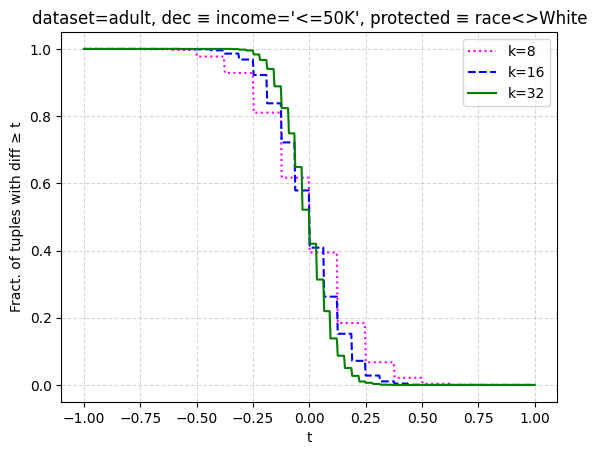

In [85]:
# Plot of (fraction of tuples with diff>=t) vs (t values)

plt.plot(t_vals_0, cdf_vals_0[8], color = 'magenta', linestyle = ':', label = 'k=8')
plt.plot(t_vals_0, cdf_vals_0[16], color = 'blue', linestyle = '--', label = 'k=16')
plt.plot(t_vals_0, cdf_vals_0[32], color = 'green', linestyle = '-', label = 'k=32')
plt.grid(color='gray', linestyle='dashed',alpha=0.3)
plt.title("dataset=adult, dec ≡ income='<=50K', protected ≡ race<>White")
plt.xlabel("t")
plt.ylabel("Fract. of tuples with diff ≥ t")
plt.legend()

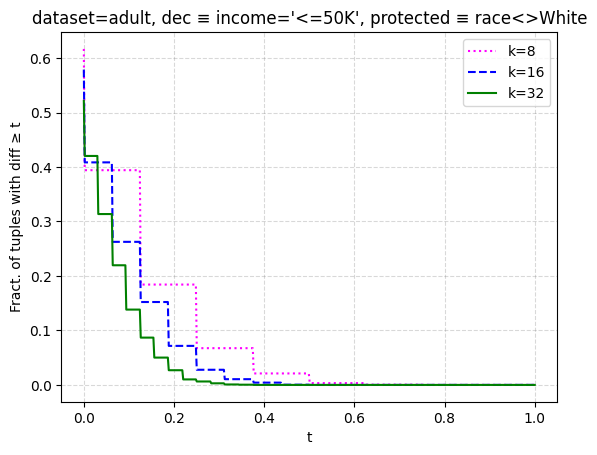

In [86]:
# Plot of (fraction of tuples with diff>=t) vs (t values)

plt.plot(t_vals_1, cdf_vals_1[8], color = 'magenta', linestyle = ':', label = 'k=8')
plt.plot(t_vals_1, cdf_vals_1[16], color = 'blue', linestyle = '--', label = 'k=16')
plt.plot(t_vals_1, cdf_vals_1[32], color = 'green', linestyle = '-', label = 'k=32')
plt.grid(color='gray', linestyle='dashed',alpha=0.3)
plt.title("dataset=adult, dec ≡ income='<=50K', protected ≡ race<>White")
plt.xlabel("t")
plt.ylabel("Fract. of tuples with diff ≥ t")
plt.legend()

## ***DiscoveryN() Algorithm***

In [87]:
# Function that implements the DiscoveryN() algorithm to produce the t-labeled dataset.

def DiscoverN(D, k, t, diff, dec):
  R = D.copy()
  R['disc'] = 0
  j = 0
  for i in range(R.shape[0]):
    if R.loc[i,'race'] != 'White':
      if R.loc[i,'income'] == dec and diff[k][j] >= t:
        R.loc[i, 'disc'] = 1
      j += 1
  return R

In [88]:
# Use DiscoveryN() function to evaluate the t-labeled dataset.

t_labeled = DiscoverN(D = sampled_data, k = 32, t = 0.10, diff = bias_data, dec = 0)

In [89]:
print('T-labeled dataset shape: ', t_labeled.shape)

T-labeled dataset shape:  (16280, 16)


In [90]:
t_labeled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,disc
0,0.099955,0,-1.126899,15,0.000000,1,5,1,White,1,-0.148422,-0.214669,-1.664474,0,0,0
1,0.834313,0,-1.023629,0,0.533333,0,0,0,White,0,-0.148422,-0.214669,-0.033506,0,0,0
2,0.540570,0,-1.526850,4,0.666667,1,7,1,White,0,-0.148422,-0.214669,0.781978,0,0,0
3,-0.854711,0,0.024772,2,0.800000,1,0,1,White,0,-0.148422,-0.214669,0.374236,0,0,0
4,1.862414,0,2.728568,0,0.533333,0,2,0,White,0,-0.148422,-0.214669,-1.990668,0,0,0


## ***PreventionN() Algorithm***

In [91]:
# Function that implements the PreventionN() algorithm to produce the t-corrected dataset.

def PreventionN(T,k,t,diff, dec):
  R = T.copy()
  j = 0
  for i in range(R.shape[0]):
    if R.loc[i,'race'] != 'White':
      if R.loc[i,'income'] == dec[0] and diff[k][j] >= t:
        R.loc[i,'income'] = dec[1]
      j += 1
  return R

In [92]:
# Use PreventionN() function to evaluate the t-corrected dataset.

t_corrected = PreventionN(T = t_labeled, k = 32, t = 0.10, diff = bias_data, dec = [0,1])

In [93]:
print('T-corrected dataset shape: ', t_corrected.shape)

T-corrected dataset shape:  (16280, 16)


In [94]:
t_corrected.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,disc
0,0.099955,0,-1.126899,15,0.000000,1,5,1,White,1,-0.148422,-0.214669,-1.664474,0,0,0
1,0.834313,0,-1.023629,0,0.533333,0,0,0,White,0,-0.148422,-0.214669,-0.033506,0,0,0
2,0.540570,0,-1.526850,4,0.666667,1,7,1,White,0,-0.148422,-0.214669,0.781978,0,0,0
3,-0.854711,0,0.024772,2,0.800000,1,0,1,White,0,-0.148422,-0.214669,0.374236,0,0,0
4,1.862414,0,2.728568,0,0.533333,0,2,0,White,0,-0.148422,-0.214669,-1.990668,0,0,0


## ***Data Preprocessing for Classification***

In [95]:
# For classification, drop missing values from t-labeled and t-corrected dataset.

t_labeled_new = t_labeled.drop(t_labeled[t_labeled['workclass'] == '?'].index)
t_labeled_new = t_labeled_new.drop(t_labeled_new[t_labeled_new['occupation'] == '?'].index)
t_labeled_new = t_labeled_new.drop(t_labeled_new[t_labeled_new['native-country'] == '?'].index)

t_corrected_new = t_corrected.drop(t_corrected[t_corrected['workclass'] == '?'].index)
t_corrected_new = t_corrected_new.drop(t_corrected_new[t_corrected_new['occupation'] == '?'].index)
t_corrected_new = t_corrected_new.drop(t_corrected_new[t_corrected_new['native-country'] == '?'].index)

In [96]:
# Drop NaN values from t-labeled and t-corrected dataset.

t_labeled_clean = t_labeled_new.dropna(ignore_index=True)
t_corrected_clean = t_corrected_new.dropna(ignore_index=True)

In [97]:
# Convert the dataype of encoded columns from object to int.

convert_dtype = {'workclass': int, 'occupation': int, 'native-country': int}

t_labeled_clean = t_labeled_clean.astype(convert_dtype)
t_corrected_clean = t_corrected_clean.astype(convert_dtype)

In [98]:
print('Cleaned t-labeled dataset shape : ', t_labeled_clean.shape)
print('Cleaned t-corrected dataset shape : ', t_corrected_clean.shape)

Cleaned t-labeled dataset shape :  (15086, 16)
Cleaned t-corrected dataset shape :  (15086, 16)


In [99]:
# Train-test split of t-labeled and t-corrected dataset.

y = t_labeled_clean['disc']

final_tlab = t_labeled_clean.copy()
final_tcor = t_corrected_clean.copy()

tlab_X_train, tlab_X_test, tlab_y_train, tlab_y_test = train_test_split(final_tlab, y, test_size=0.3, random_state=42)
tcor_X_train, tcor_X_test, tcor_y_train, tcor_y_test = train_test_split(final_tcor, y, test_size=0.3, random_state=42)

In [100]:
# Set of legally-grounded attributes.

G = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
     'marital-status', 'occupation', 'relationship', 'sex',
     'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

In [101]:
# Project the train and test data on the set of G attributes.

tlab_X_train_proj = tlab_X_train[G]
tlab_X_test_proj = tlab_X_test[G]
tcor_X_train_proj = tcor_X_train[G]
tcor_X_test_proj = tcor_X_test[G]

## ***Classification***

### 1. Naive Bayes Classifier

In [102]:
# Naive bayes classification on t_labeled dataset.

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb_tlab = GaussianNB()
gnb_tlab.fit(tlab_X_train_proj, tlab_y_train)

gnb_tlab_y_pred = gnb_tlab.predict(tlab_X_test_proj)
gnb_tlab_accuracy = metrics.accuracy_score(tlab_y_test, gnb_tlab_y_pred)

print("Naive Bayes accuracy (T-labeled dataset) : ", round(gnb_tlab_accuracy*100,2), "%")

Naive Bayes accuracy (T-labeled dataset) :  31.18 %


In [103]:
# Function implementation of 0.10-discrimination.

def disc_0_10(D, k, y_pred, t,interval_attr,nominal_attr,ordinal_attr):
  k1_test, k2_test = knn(R=D,k=k,interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)
  bias_test = bias_calc(R=D,k=k,K1=k1_test,K2=k2_test,dec=0)
  frac = 0
  total_pr = 0
  j=0
  for i in D.index.tolist():
    if D.loc[i,'race'] != 'White':
      if y_pred[j] == 1 and bias_test[total_pr] >= t:
        frac += 1
      total_pr += 1
    j+=1
  prop = frac/total_pr
  return prop

In [104]:
# Calculate the 0.10 discrimination for t-labeled dataset.

tlab_0_10_discr = disc_0_10(D = tlab_X_test, k = 32, y_pred = gnb_tlab_y_pred, t = 0.10,
                            interval_attr = interval_attr, nominal_attr = nominal_attr, ordinal_attr = ordinal_attr)

print('0.10-discrimination for t-labeled dataset: ', round(tlab_0_10_discr*100,2), "%")

0.10-discrimination for t-labeled dataset:  15.56 %


In [105]:
# Naive bayes classification on t_corrected dataset.

gnb_tcor = GaussianNB()
gnb_tcor.fit(tcor_X_train_proj, tcor_y_train)

gnb_tcor_y_pred = gnb_tcor.predict(tcor_X_test_proj)
gnb_tcor_accuracy = metrics.accuracy_score(tcor_y_test, gnb_tcor_y_pred)

print("Naive Bayes accuracy: ", round(gnb_tcor_accuracy*100,2),"%")

Naive Bayes accuracy:  82.39 %


In [106]:
# Calculate the 0.10 discrimination for t-corrected dataset.

tcor_0_10_discr = disc_0_10(D=tcor_X_test, k = 32, y_pred = gnb_tcor_y_pred, t = 0.10, \
                            interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

print('0.10-discrimination for t-corrected dataset: ', round(tcor_0_10_discr*100,2),"%")

0.10-discrimination for t-corrected dataset:  3.02 %


### 2. Logistic Regression Classifier

In [107]:
# Logistic regression classification on t_labeled dataset.

from sklearn.linear_model import LogisticRegression

tlab_log = LogisticRegression()
tlab_log.fit(tlab_X_train_proj, tlab_y_train)

log_tlab_y_pred = tlab_log.predict(tlab_X_test_proj)
log_tlab_accuracy = metrics.accuracy_score(tlab_y_test, log_tlab_y_pred)

print("Logistic Regression accuracy (T-labeled dataset): ", round(log_tlab_accuracy*100,2),"%")

Logistic Regression accuracy (T-labeled dataset):  98.54 %


In [108]:
# Calculate the 0.10 discrimination for t_labeled dataset.

log_tlab_0_10_discr = disc_0_10(D=tlab_X_test, k = 16, y_pred = log_tlab_y_pred, t = 0.10, \
                            interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

print('0.10-discrimination for t-labeled dataset: ', round(log_tlab_0_10_discr*100,2),"%")

0.10-discrimination for t-labeled dataset:  0.0 %


In [109]:
# Logistic regression classification on t_corrected dataset.

tcor_log = LogisticRegression()
tcor_log.fit(tcor_X_train_proj, tcor_y_train)

log_tcor_y_pred = tcor_log.predict(tcor_X_test_proj)
log_tcor_accuracy = metrics.accuracy_score(tcor_y_test, log_tcor_y_pred)

print("Logistic Regression accuracy (T-corrected dataset): ", round(log_tcor_accuracy*100,2),"%")

Logistic Regression accuracy (T-corrected dataset):  98.92 %


In [110]:
# Calculate the 0.10 discrimination for t_corrected dataset.

log_tcor_0_10_discr = disc_0_10(D=tcor_X_test, k = 16, y_pred = log_tcor_y_pred, t = 0.10, \
                            interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

print('0.10-discrimination for t-labeled dataset: ', round(log_tcor_0_10_discr*100,2),"%")

0.10-discrimination for t-labeled dataset:  0.79 %


### 3. Decision Tree Classifier

In [111]:
# Decision Trees classification for t-labeled dataset.

from sklearn.tree import DecisionTreeClassifier

tlab_dt = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
tlab_dt.fit(tlab_X_train_proj, tlab_y_train)

dt_tlab_y_pred = tlab_dt.predict(tlab_X_test_proj)
dt_tlab_accuracy = metrics.accuracy_score(tlab_y_test, dt_tlab_y_pred)

print("Decision accuracy (T-labeled dataset): ", round(dt_tlab_accuracy*100,2),"%")

Decision accuracy (T-labeled dataset):  98.54 %


In [112]:
# Calculate the 0.10 discrimination for t_labeled dataset.

dt_tlab_0_10_discr = disc_0_10(D=tlab_X_test, k = 16, y_pred = dt_tlab_y_pred, t = 0.10, \
                            interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

print('0.10-discrimination for t-labeled dataset: ', round(dt_tlab_0_10_discr*100,2),"%")

0.10-discrimination for t-labeled dataset:  0.0 %


In [113]:
# Decision Trees classification for t_corrected dataset.

tcor_dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
tcor_dt.fit(tcor_X_train_proj, tcor_y_train)

dt_tcor_y_pred = tcor_dt.predict(tcor_X_test_proj)
dt_tcor_accuracy = metrics.accuracy_score(tcor_y_test, dt_tcor_y_pred)

print("Decision accuracy (T-corrected dataset): ", round(dt_tcor_accuracy*100,2),"%")

Decision accuracy (T-corrected dataset):  98.67 %


In [114]:
# Calculate the 0.10 discrimination for t_corrected dataset.

dt_tcor_0_10_discr = disc_0_10(D=tcor_X_test, k = 16, y_pred = dt_tcor_y_pred, t = 0.10, \
                            interval_attr=interval_attr,nominal_attr=nominal_attr,ordinal_attr=ordinal_attr)

print('0.10-discrimination for t-corrected dataset: ', round(dt_tcor_0_10_discr*100,2),"%")

0.10-discrimination for t-corrected dataset:  2.06 %
